In [1]:
import pandas as pd
import numpy as np

In [2]:
cleaned_data = pd.read_csv('dataset/used_cars_cleaned.csv')

In [3]:
cleaned_data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,drive,size,type,paint_color,description,state,lat,long,is_condition_imputed,is_title_status_imputed
0,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,4wd,unspecified,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False,False
1,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,4wd,full-size,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False,False
2,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,4wd,unspecified,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False,False
3,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,4wd,full-size,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590,-85.4800,False,False
4,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592,-85.5189,False,False


In [4]:
cleaned_data.shape

(246680, 21)

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246680 entries, 0 to 246679
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   246680 non-null  object 
 1   price                    246680 non-null  int64  
 2   year                     246680 non-null  int64  
 3   manufacturer             246680 non-null  object 
 4   model                    246680 non-null  object 
 5   condition                246680 non-null  object 
 6   cylinders                246680 non-null  object 
 7   fuel                     246680 non-null  object 
 8   odometer                 246680 non-null  float64
 9   title_status             246680 non-null  object 
 10  transmission             246680 non-null  object 
 11  drive                    246680 non-null  object 
 12  size                     246680 non-null  object 
 13  type                     246680 non-null  object 
 14  pain

In [6]:
cleaned_data.describe()

,price,year,odometer,lat,long
count,246680.000000,246680.000000,246680.000000,246490.000000,246490.000000
mean,26601.675823,2013.666422,67549.955594,38.416280,-94.962267
std,14307.718128,8.855929,49938.836949,6.027038,18.645774
min,10020.000000,1910.000000,0.000000,-38.115380,-159.719900
25%,15999.000000,2013.000000,26852.750000,34.183005,-111.855205
50%,23990.000000,2016.000000,57899.000000,38.946200,-89.010000
75%,33590.000000,2018.000000,99575.000000,42.364188,-81.338867
max,470000.000000,2022.000000,241292.000000,65.735076,139.691700


# Validate Imputation

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
# Separate original vs imputed within the 'good' condition
orig_good = cleaned_data.loc[~cleaned_data['is_condition_imputed'] & (cleaned_data['condition']=='good'), 'price']
imp_good  = cleaned_data.loc[ cleaned_data['is_condition_imputed'] & (cleaned_data['condition']=='good'), 'price']

# Compute means/medians
print("Original good mean:",  orig_good.mean(), "median:", orig_good.median())
print("Imputed good mean:",   imp_good.mean(),  "median:", imp_good.median())

# Mann–Whitney U test
u_stat, p_val = mannwhitneyu(orig_good, imp_good, alternative='two-sided')
print("Mann-Whitney p-value:", p_val)


Original good mean: 27551.76095215196 median: 26990.0
Imputed good mean: 27818.507900075823 median: 23697.0
Mann–Whitney p‑value: 7.691221148694658e-293


In [9]:
# Separate original vs imputed within the 'good' condition
orig_good = cleaned_data.loc[~cleaned_data['is_title_status_imputed'] & (cleaned_data['title_status']=='clean'), 'price']
imp_good  = cleaned_data.loc[ cleaned_data['is_title_status_imputed'] & (cleaned_data['title_status']=='clean'), 'price']

# Compute means/medians
print("Original clean mean:",  orig_good.mean(), "median:", orig_good.median())
print("Imputed clean mean:",   imp_good.mean(),  "median:", imp_good.median())

# Mann–Whitney U test
u_stat, p_val = mannwhitneyu(orig_good, imp_good, alternative='two-sided')
print("Mann-Whitney p-value:", p_val)

Original clean mean: 26779.33884758836 median: 23995.0
Imputed clean mean: 24671.196904761906 median: 18999.0
Mann-Whitney p-value: 4.146455090007592e-65


The imputed “clean” and “good” groups do not mirror the originals (both mean & median shift substantially > 5%, and p ≪ 0.001).

# Exploratory Data Analysis

In [26]:
excluded_cols = ['description', 'lat', 'long']

In [27]:
visualize_data = cleaned_data.drop(columns=excluded_cols)

In [ ]:
visualize_data = visualize_data[(visualize_data.is_condition_imputed == False) & (visualize_data.is_title_status_imputed == False)]

In [29]:
visualize_data.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,is_condition_imputed,is_title_status_imputed
0,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,unspecified,pickup,white,al,False,False
1,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,al,False,False
2,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,unspecified,pickup,red,al,False,False
3,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,al,False,False
4,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,False,False


In [47]:
visualize_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146324 entries, 0 to 246679
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   146324 non-null  object 
 1   price                    146324 non-null  int64  
 2   year                     146324 non-null  int64  
 3   manufacturer             146324 non-null  object 
 4   model                    146324 non-null  object 
 5   condition                146324 non-null  int64  
 6   cylinders                146324 non-null  object 
 7   fuel                     146324 non-null  object 
 8   odometer                 146324 non-null  float64
 9   title_status             146324 non-null  int64  
 10  transmission             146324 non-null  object 
 11  drive                    146324 non-null  object 
 12  size                     146324 non-null  object 
 13  type                     146324 non-null  object 
 14  paint_col

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
num_cols = visualize_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = visualize_data.select_dtypes(include=['object']).columns

In [32]:
low_cardinal_cat_cols = [col for col in cat_cols if visualize_data[col].nunique() < 20]
high_cardinal_cat_cols = [col for col in cat_cols if visualize_data[col].nunique() >= 20]

In [33]:
print("Numerical Columns:", num_cols)
print("Categorical Columns:", low_cardinal_cat_cols, high_cardinal_cat_cols)

Numerical Columns: Index(['price', 'year', 'odometer'], dtype='object')
Categorical Columns: ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'] ['region', 'manufacturer', 'model', 'state']


For now let's bin the classes that are below top-20 for the high cardinality features

In [34]:
k = 20  # Number of top categories to display

for col in high_cardinal_cat_cols:
    map = cleaned_data[col].value_counts().head(k).index
    visualize_data[col] = visualize_data[col].apply(lambda x: x if x in map else 'other')

## Univariate Analysis

### Numerical

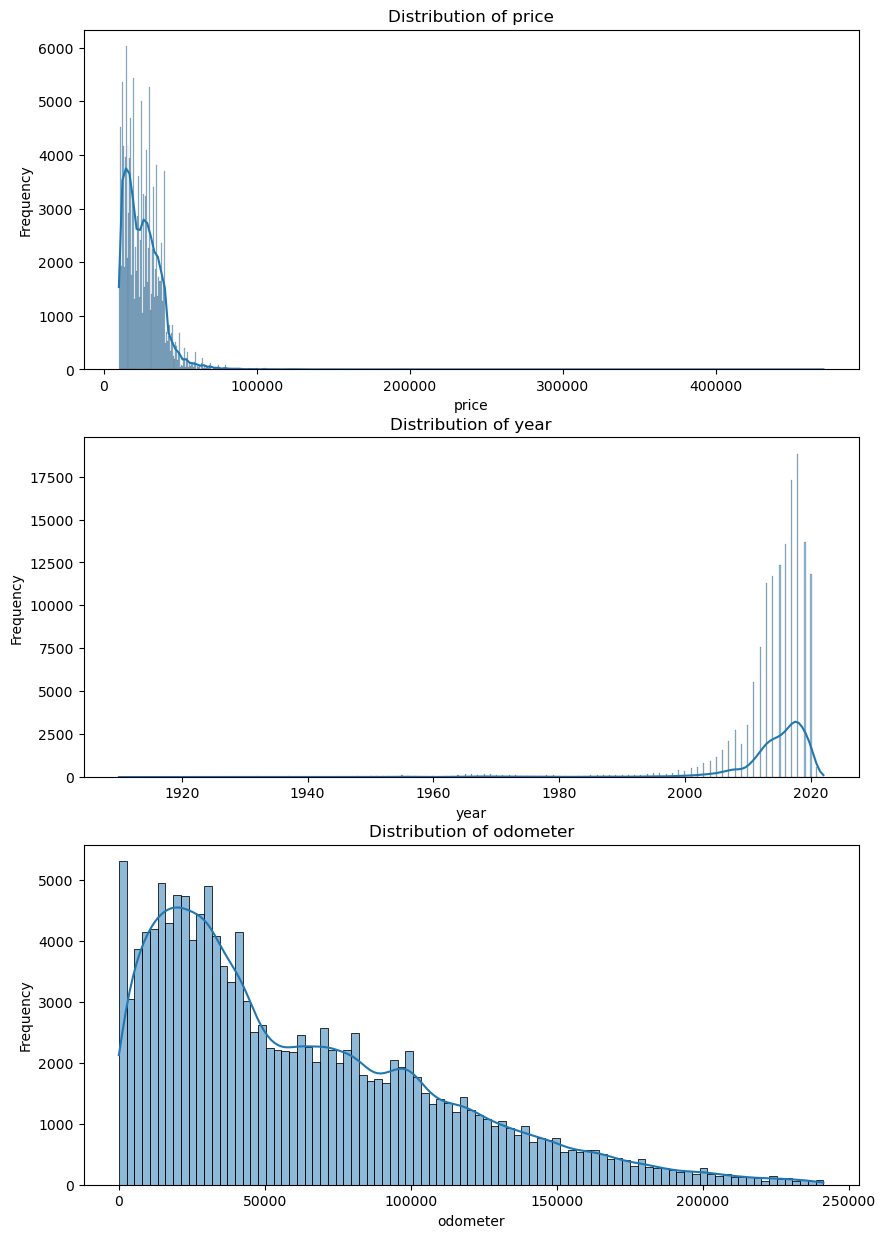

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [35]:
fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 5 * len(num_cols)), sharex=False, sharey=False)

for i, col in enumerate(num_cols):
    ax = axes[i]
    plt.figure(figsize=(10, 5))
    sns.histplot(visualize_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.tight_layout()
plt.show()

*Summary of Numerical Features*

Price: The distribution of price is heavily right skewed, almost 90% of the used cars are priced below 100,000 <br>

Year: The distribution of year is heavily left skewed, almost 90% of the used cars are produced after the 2000s <br> 

Odometer: The distribution of odometer is right skewed, most of the use cars have a mileage below 150,000 <br> 

### Categorical

Column: condition
           Count  Frequency
condition                  
good       83180   0.568465
excellent  49247   0.336561
like new   12822   0.087627
new          746   0.005098
fair         289   0.001975
salvage       40   0.000273
Column: cylinders
              Count  Frequency
cylinders                     
6 cylinders   47372   0.323747
8 cylinders   39707   0.271364
unspecified   33597   0.229607
4 cylinders   24020   0.164156
10 cylinders    677   0.004627
other           373   0.002549
5 cylinders     252   0.001722
3 cylinders     211   0.001442
12 cylinders    112   0.000765
0 cylinders       3   0.000021
Column: fuel
              Count  Frequency
fuel                          
gas          113962   0.778833
other         19941   0.136280
diesel         9553   0.065287
hybrid         1891   0.012923
electric        969   0.006622
unspecified       8   0.000055
Column: title_status
               Count  Frequency
title_status                   
clean         141927  

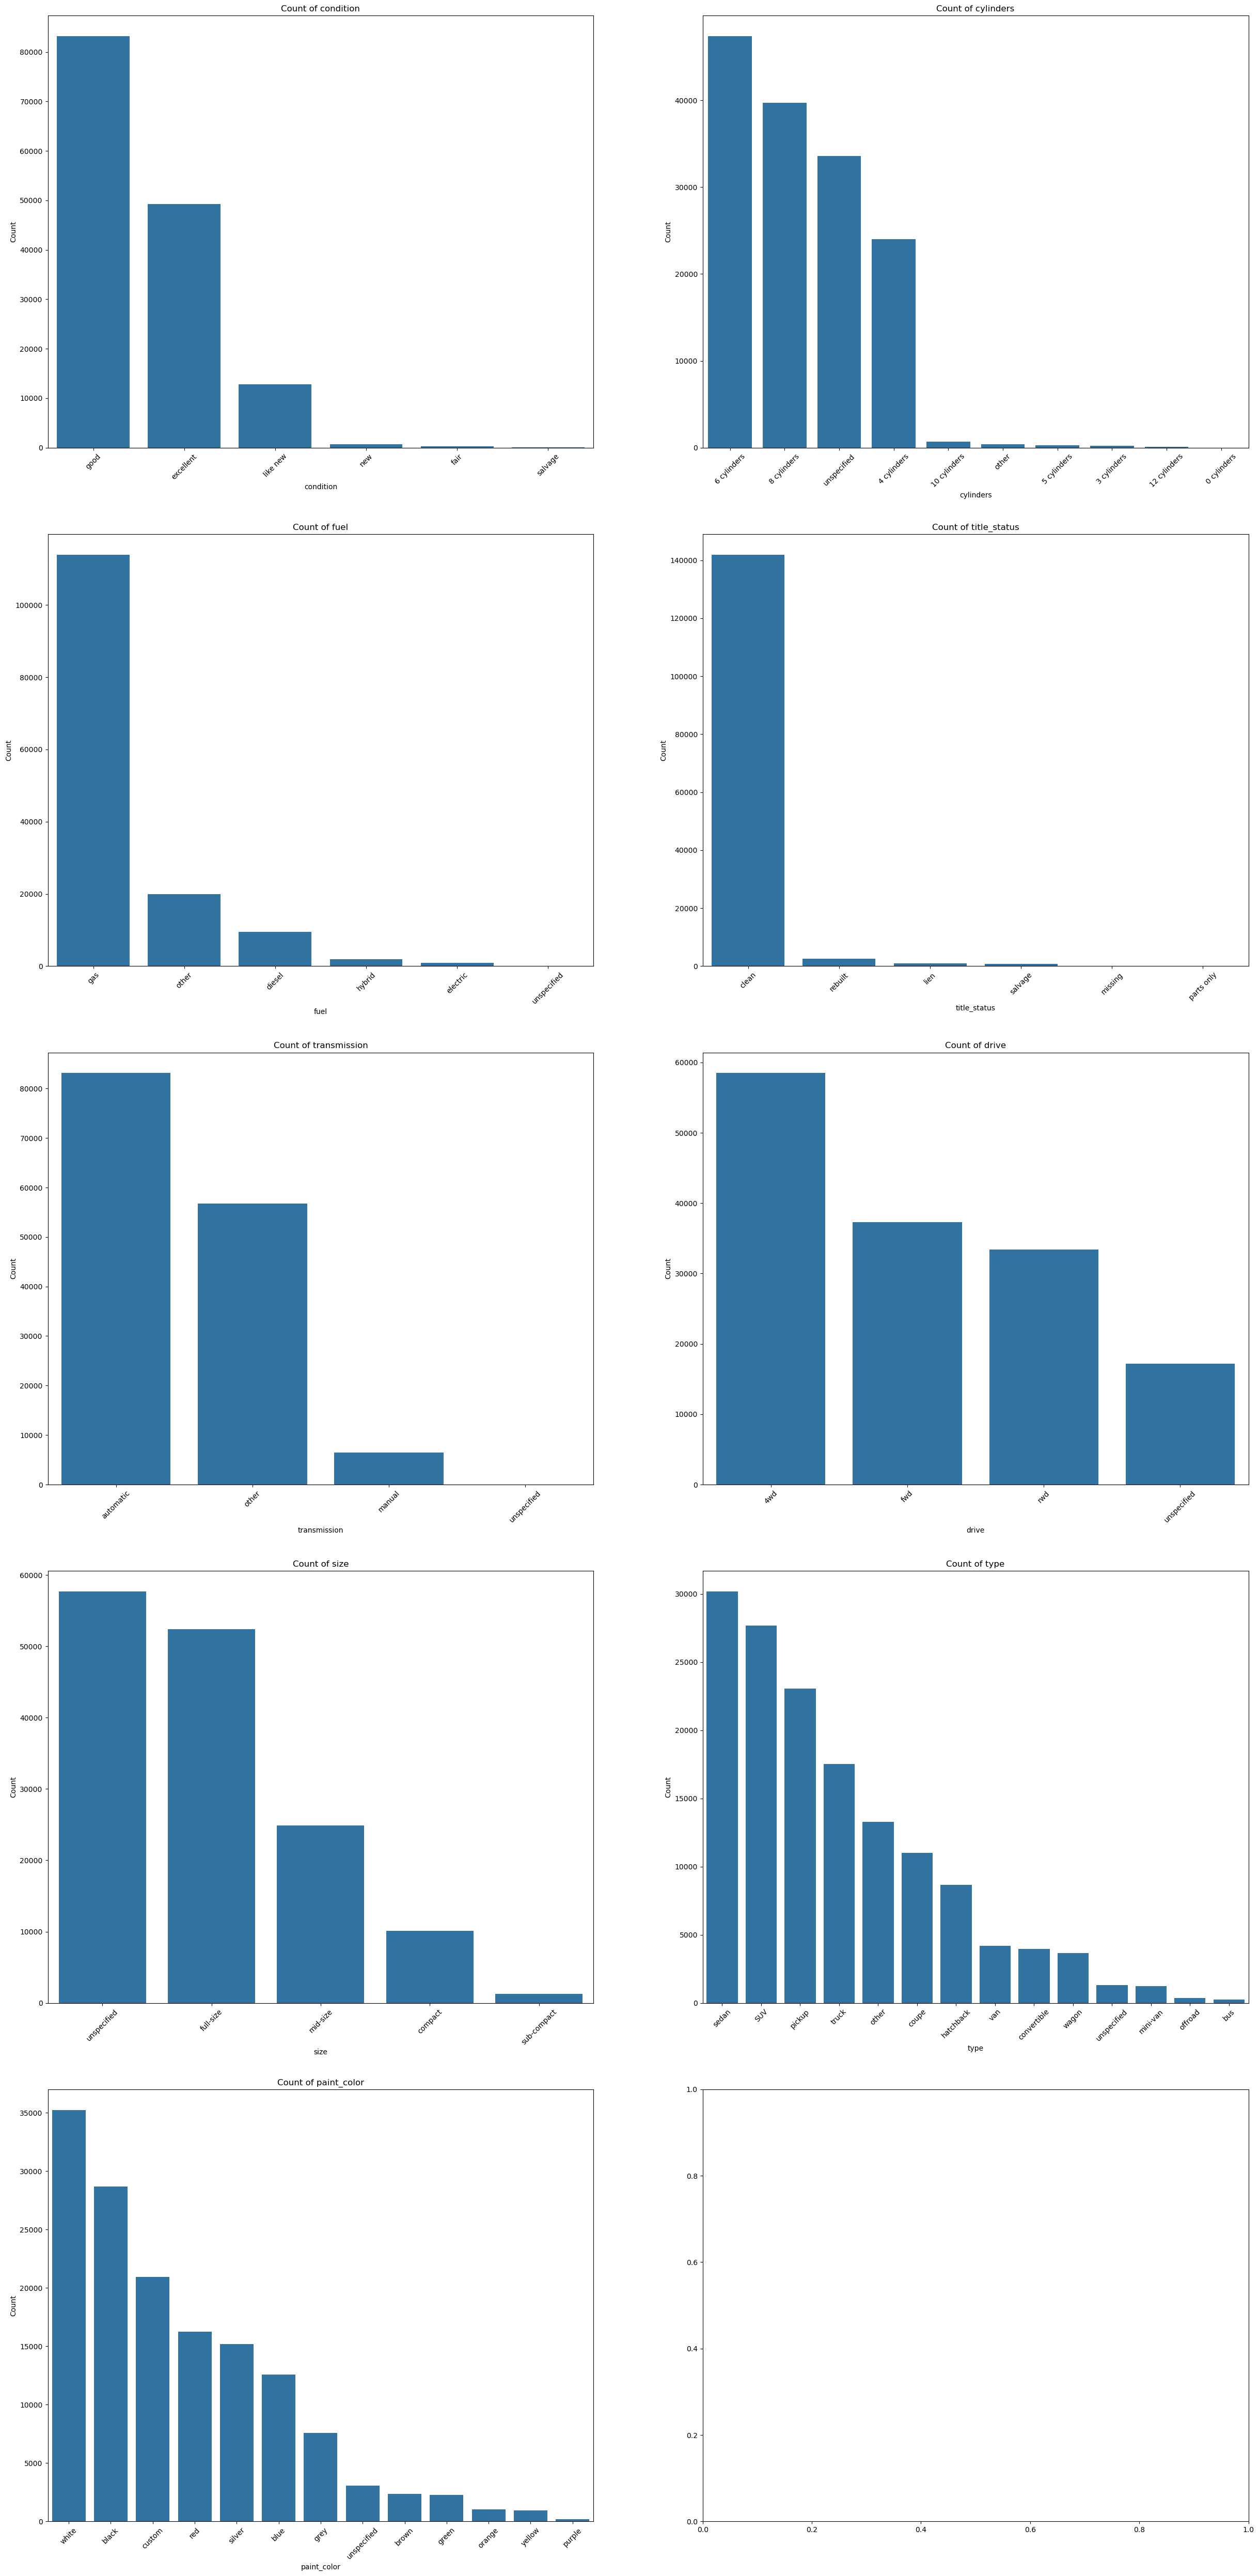

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [36]:
fig, axes = plt.subplots(5, 2, figsize=(15 * 2, 7 * len(low_cardinal_cat_cols)), sharex=False, sharey=False)

for i, col in enumerate(low_cardinal_cat_cols):
    ax = axes[i // 2, i % 2]
    plt.figure(figsize=(10, 5))
    sns.countplot(data=visualize_data, x=col, order=visualize_data[col].value_counts().index, ax= ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    print(f"Column: {col}")
    print(pd.concat([visualize_data[col].value_counts(), visualize_data[col].value_counts(normalize=True)], axis=1, keys=['Count', 'Frequency']))
    print("=" * 20)

plt.suptitle('Count of Low Cardinality Categorical Columns', fontsize=16)
plt.tight_layout()
plt.show()

*Summary of Low-Cardinality Categorical Features*

We observe across all features, there are imbalance class representations, Based on intuition and domain knowledge, we further differentiate these categorical classes as ordinal (title_status, condition) and nominal categories (cylinders, fuel, transmission, drive, size, type, paint_color), we'll further confirm our hypothesis later. Based on this we also might group some of the rare classes together

Column: region
                           Count  Frequency
region                                     
other                     127404   0.870698
ft myers / SW florida       1314   0.008980
phoenix                     1256   0.008584
stockton                    1240   0.008474
nashville                   1240   0.008474
jacksonville                1214   0.008297
reno / tahoe                1181   0.008071
tucson                      1156   0.007900
grand rapids                1108   0.007572
sarasota-bradenton          1033   0.007060
austin                      1003   0.006855
las vegas                    976   0.006670
tampa bay area               912   0.006233
colorado springs             856   0.005850
san antonio                  844   0.005768
anchorage / mat-su           833   0.005693
st louis, MO                 817   0.005583
omaha / council bluffs       633   0.004326
boise                        549   0.003752
hawaii                       516   0.003526
kennewick-pasco-r

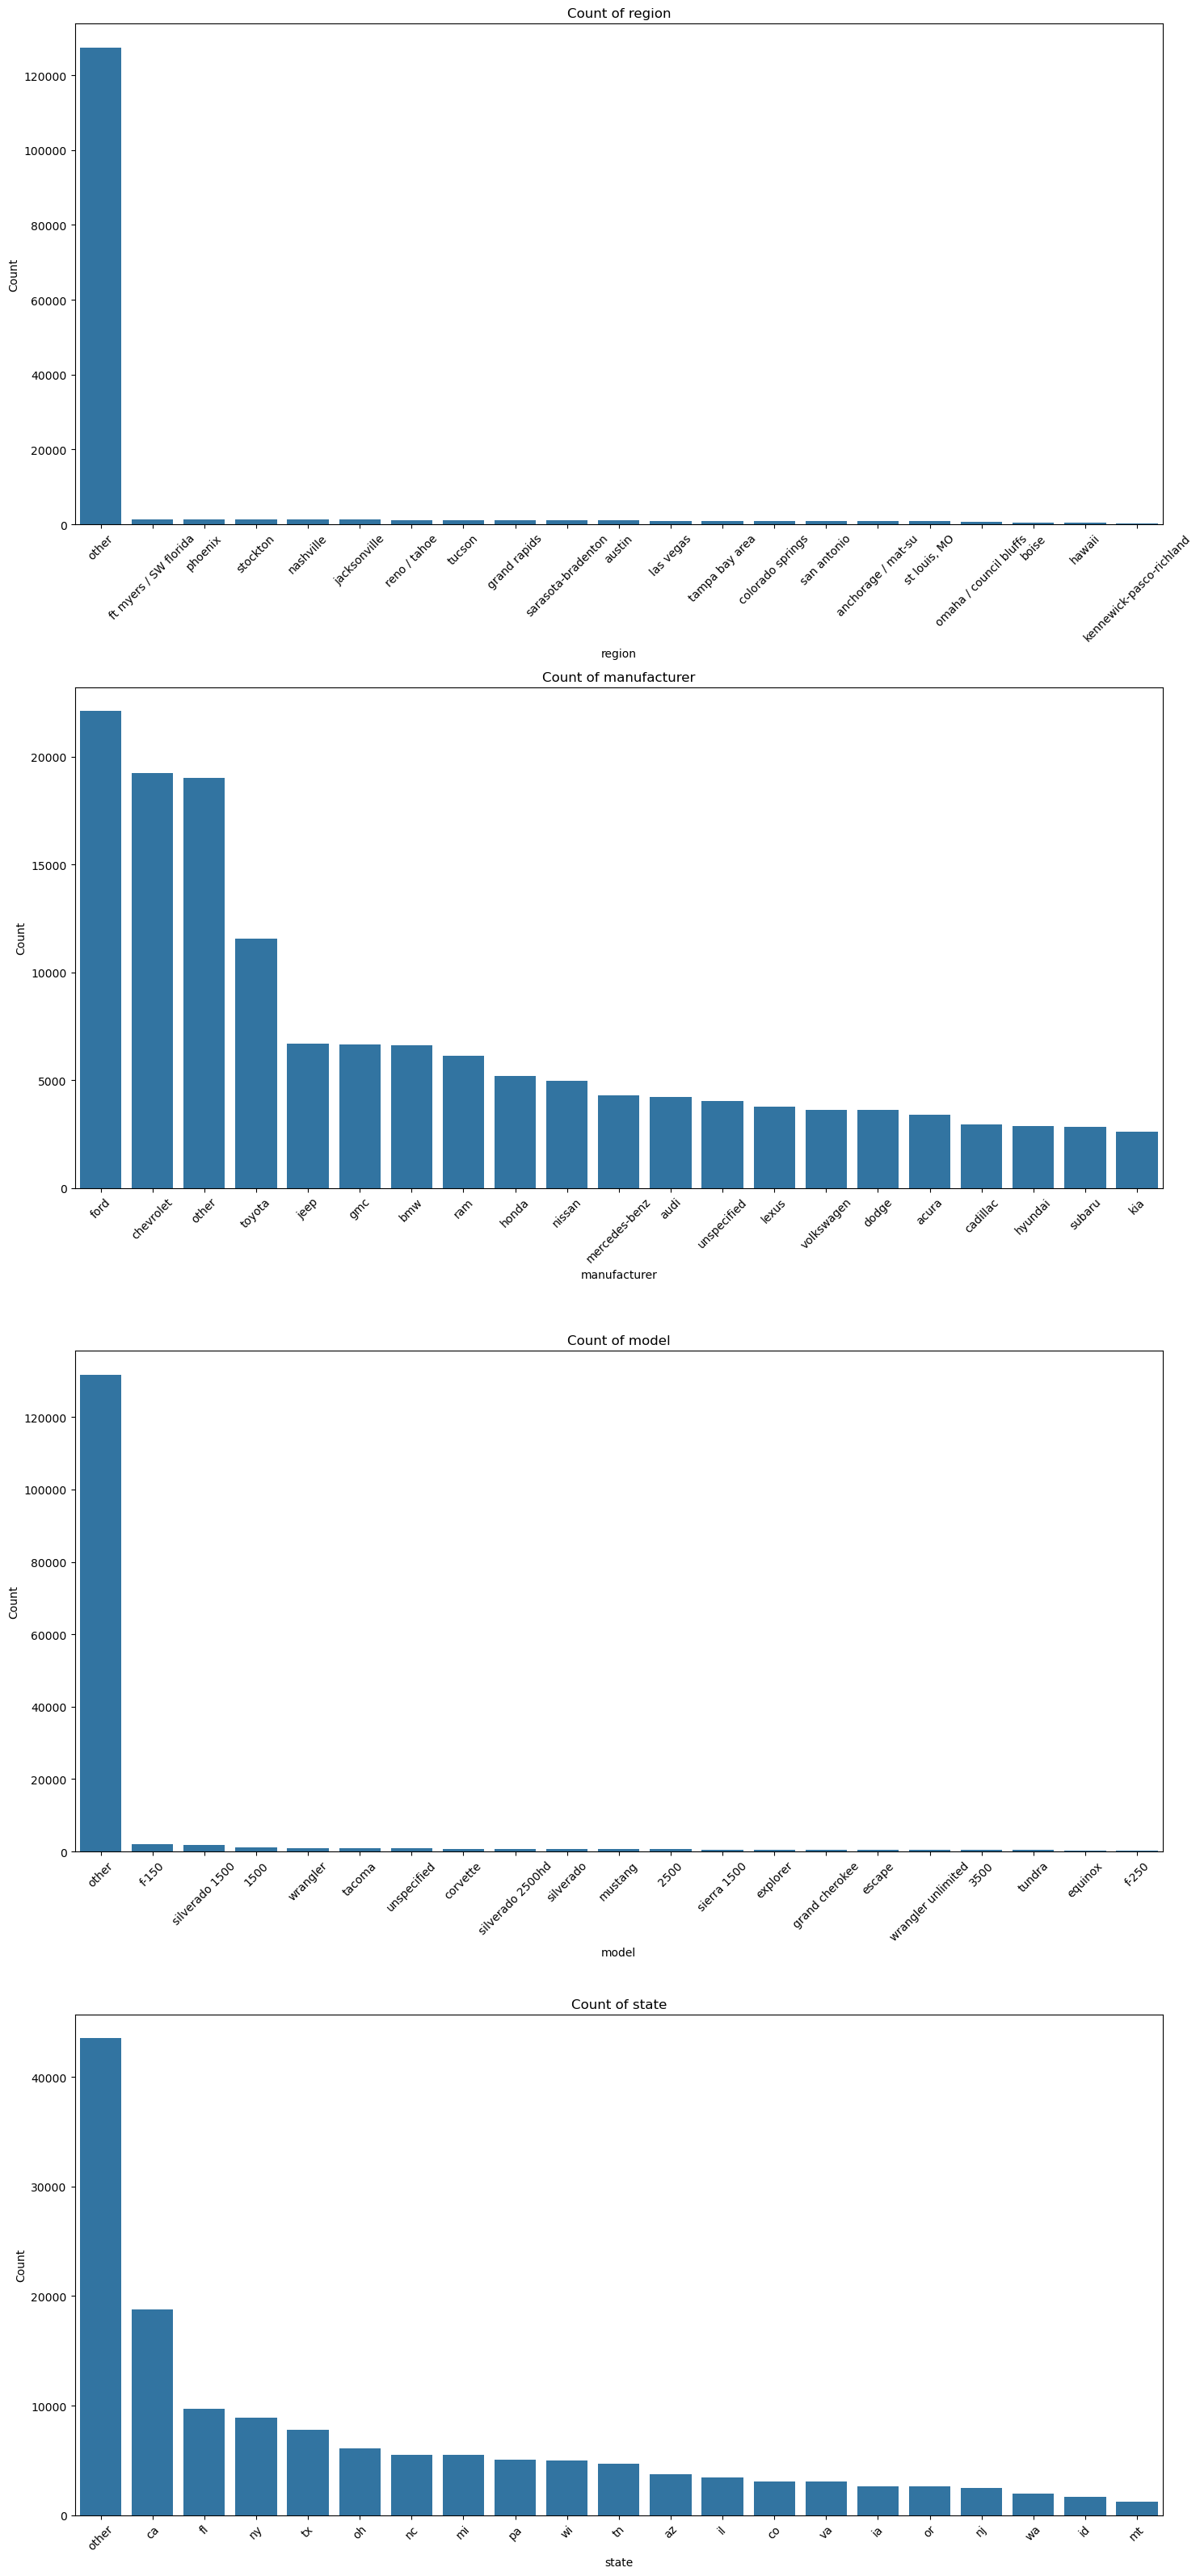

In [37]:
fig, axes = plt.subplots(len(high_cardinal_cat_cols), 1, sharex=False, sharey=False, figsize=(15, 8 * len(high_cardinal_cat_cols)))

for i, col in enumerate(high_cardinal_cat_cols):
    ax = axes[i]
    sns.countplot(data=visualize_data, x=col, order=visualize_data[col].value_counts().index, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    print(f"Column: {col}")
    print(pd.concat([visualize_data[col].value_counts(), visualize_data[col].value_counts(normalize=True)], axis=1, keys=['Count', 'Frequency']))
    print("=" * 20)

# plt.suptitle('Count of High Cardinality Categorical Columns', fontsize=16)
plt.tight_layout()
plt.show()

*Summary of High-Cardinality Categorical Features*

Region and Model is relatively uniformly distributed, While Manufacturer and State are long-tailed

## Bivariate Analysis

I'll plot every pair, but for simplicity i will be focusing on my target variable which is predicting the price

I'll also separate the nominal and ordinal categories, while giving an encoding for the ordinal features

In [39]:
ordinal_cats = ['condition', 'title_status']
nominal_cats = [col for col in cat_cols if col not in ordinal_cats]

In [40]:
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}

title_status_mapping = {
    'clean': 3,
    'rebuilt': 2,
    'salvage': 1,
    'lien': 0,
    'missing': -1,
    'parts only': -2,
    'unspecified': -3
}

In [41]:
visualize_data['condition'] = visualize_data['condition'].map(condition_mapping)
visualize_data['title_status'] = visualize_data['title_status'].map(title_status_mapping)

### Numerical - Numerical

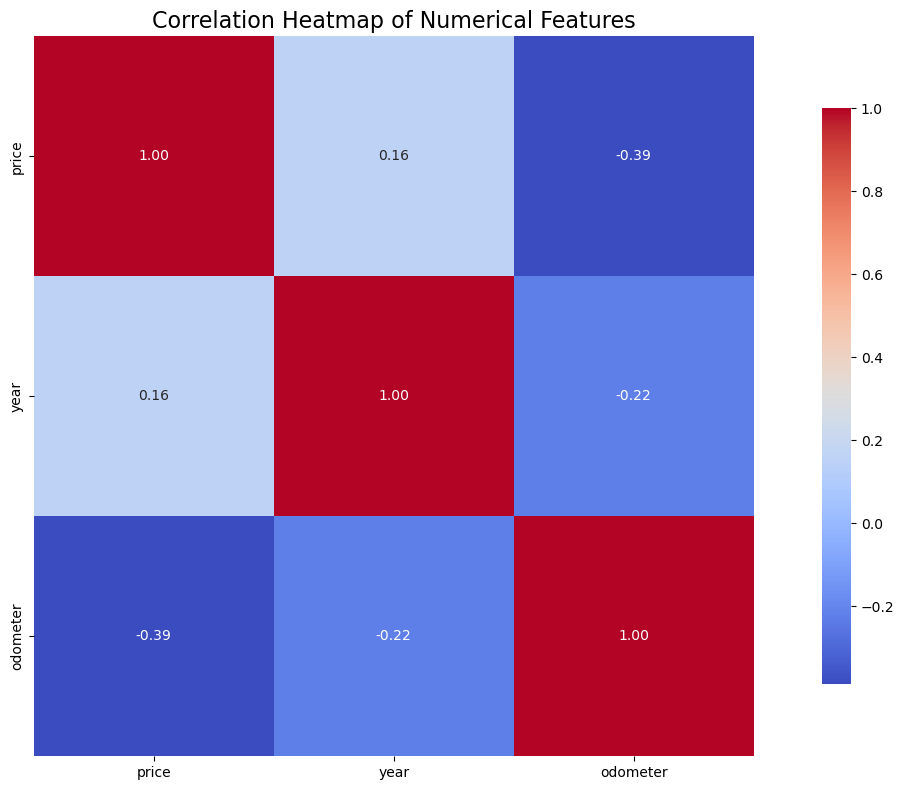

In [42]:
plt.figure(figsize=(14, 8))
sns.heatmap(visualize_data[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Year: There isn't a clear trend or correlation between year and price
Odometer: There is a moderate trend where Odometer and Price is negatively correlated (as odometer increases, price decreases)

### Numerical - Categorical

#### Nominal

Numerical Column: price


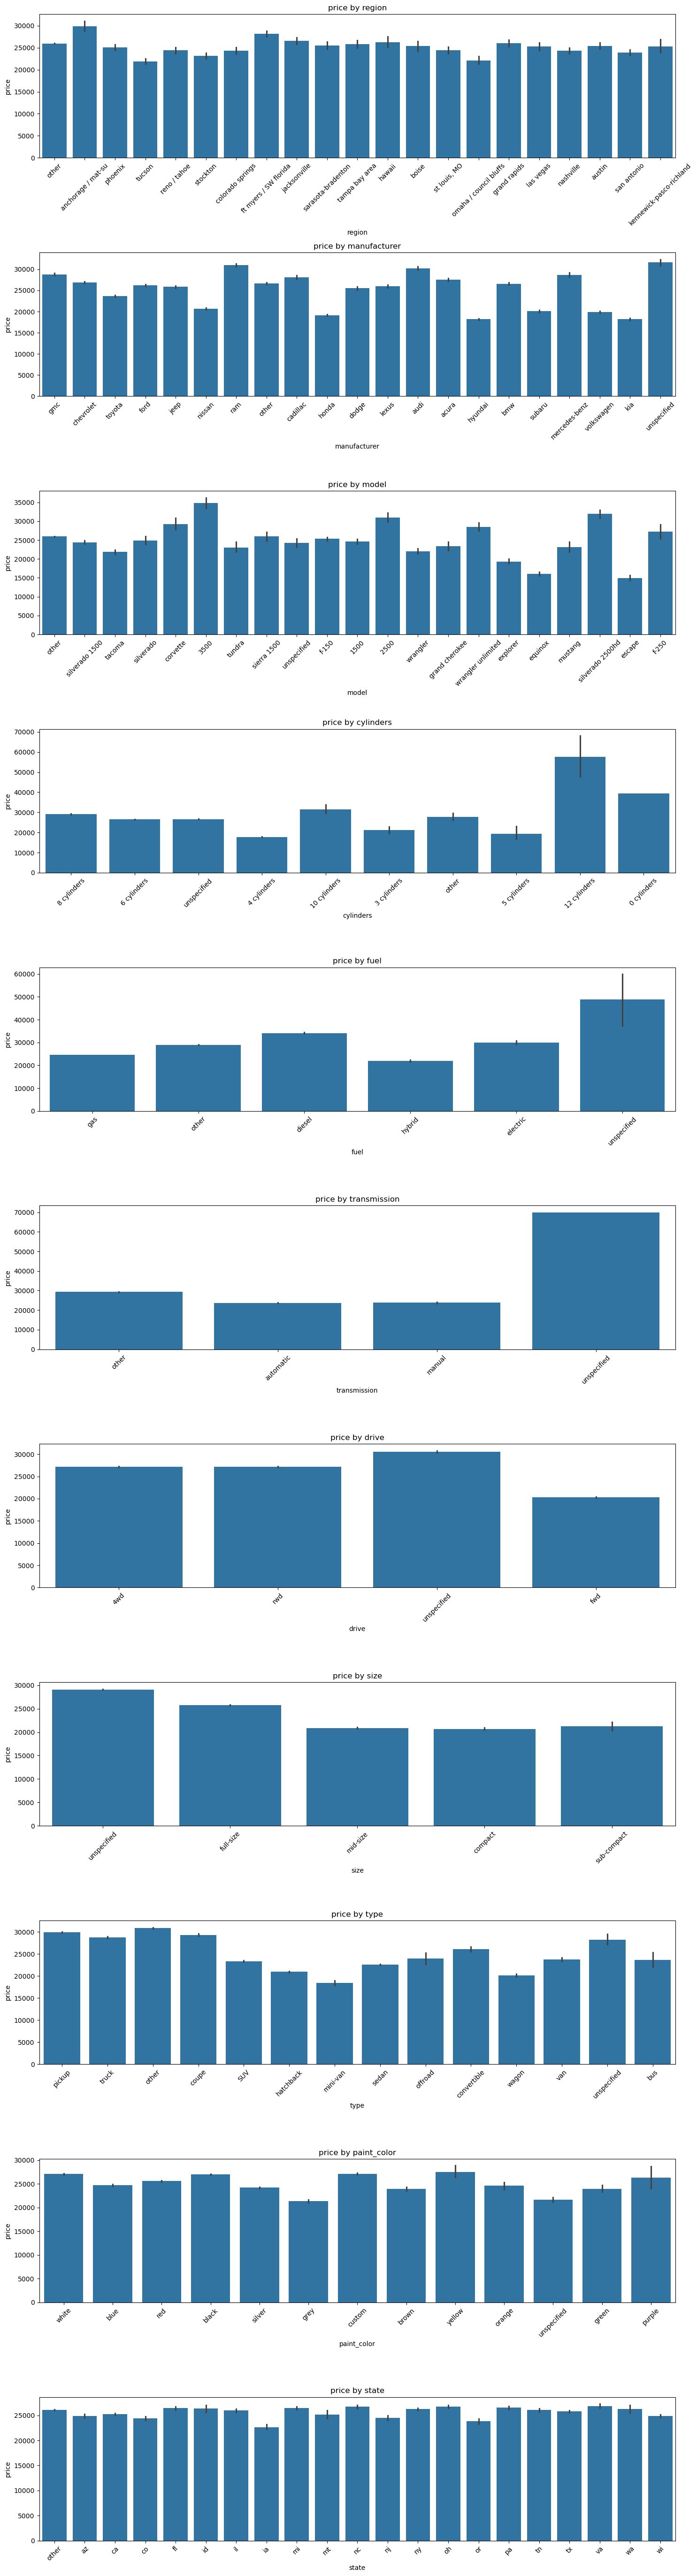

Numerical Column: year


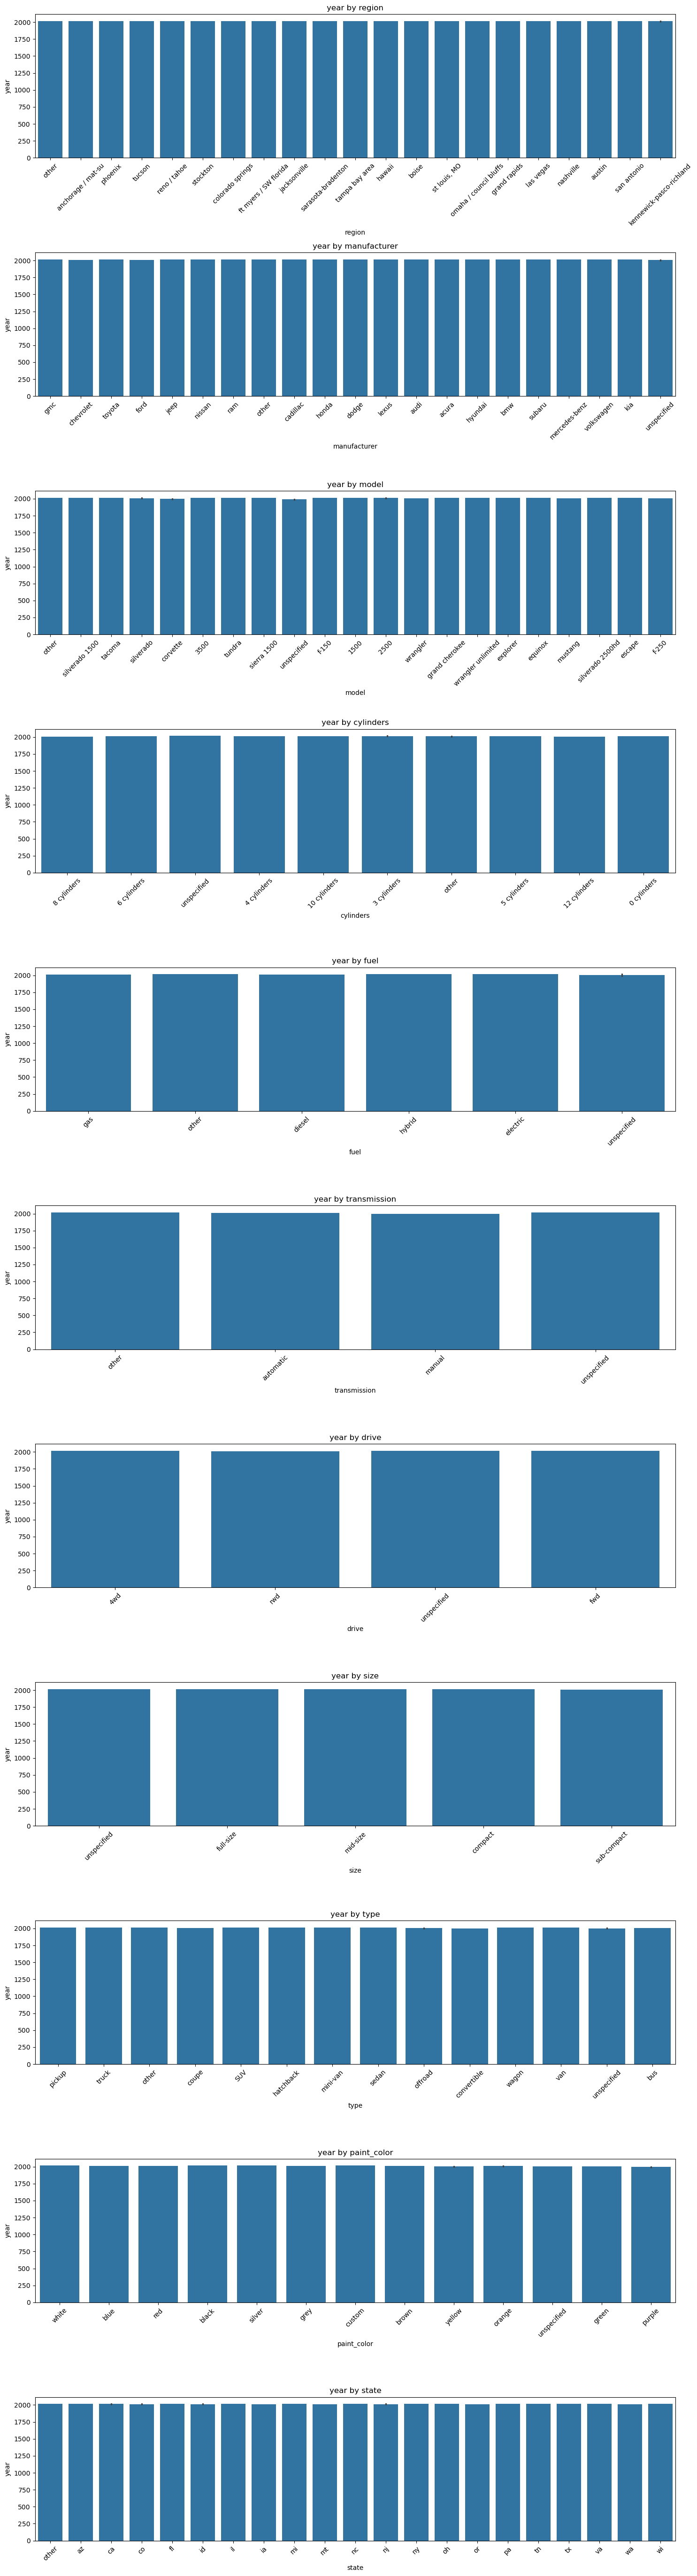

Numerical Column: odometer


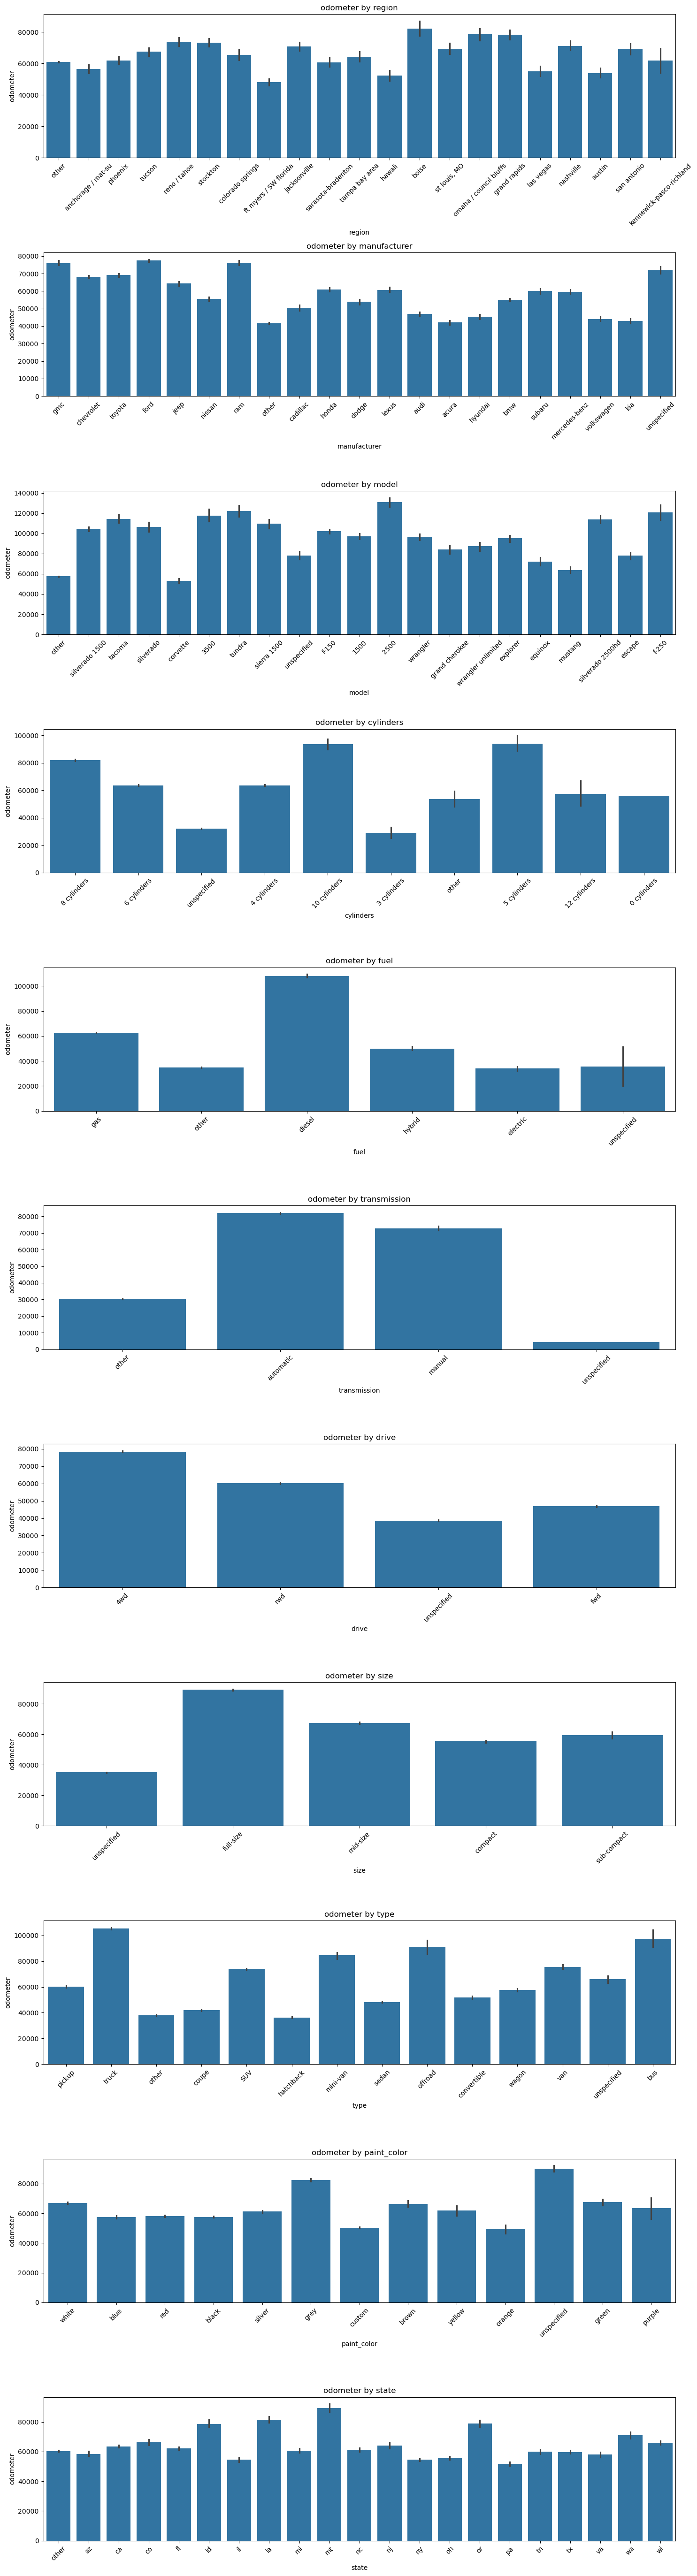

In [43]:
for i, num in enumerate(num_cols):
    print(f"Numerical Column: {num}")
    fig, axes = plt.subplots(len(nominal_cats), 1, figsize=(15, 5 * len(nominal_cats)), sharex=False, sharey=False)
    for j, cat in enumerate(nominal_cats):
        ax = axes[j]
        sns.barplot(data=visualize_data, x=cat, y=num, ax=ax, errorbar=('ci', 95))
        ax.set_title(f'{num} by {cat}')
        ax.tick_params(axis='x', rotation=45)   
    plt.tight_layout()
    plt.show()
    print("=" * 30)

#### Ordinal

Numerical Column: price


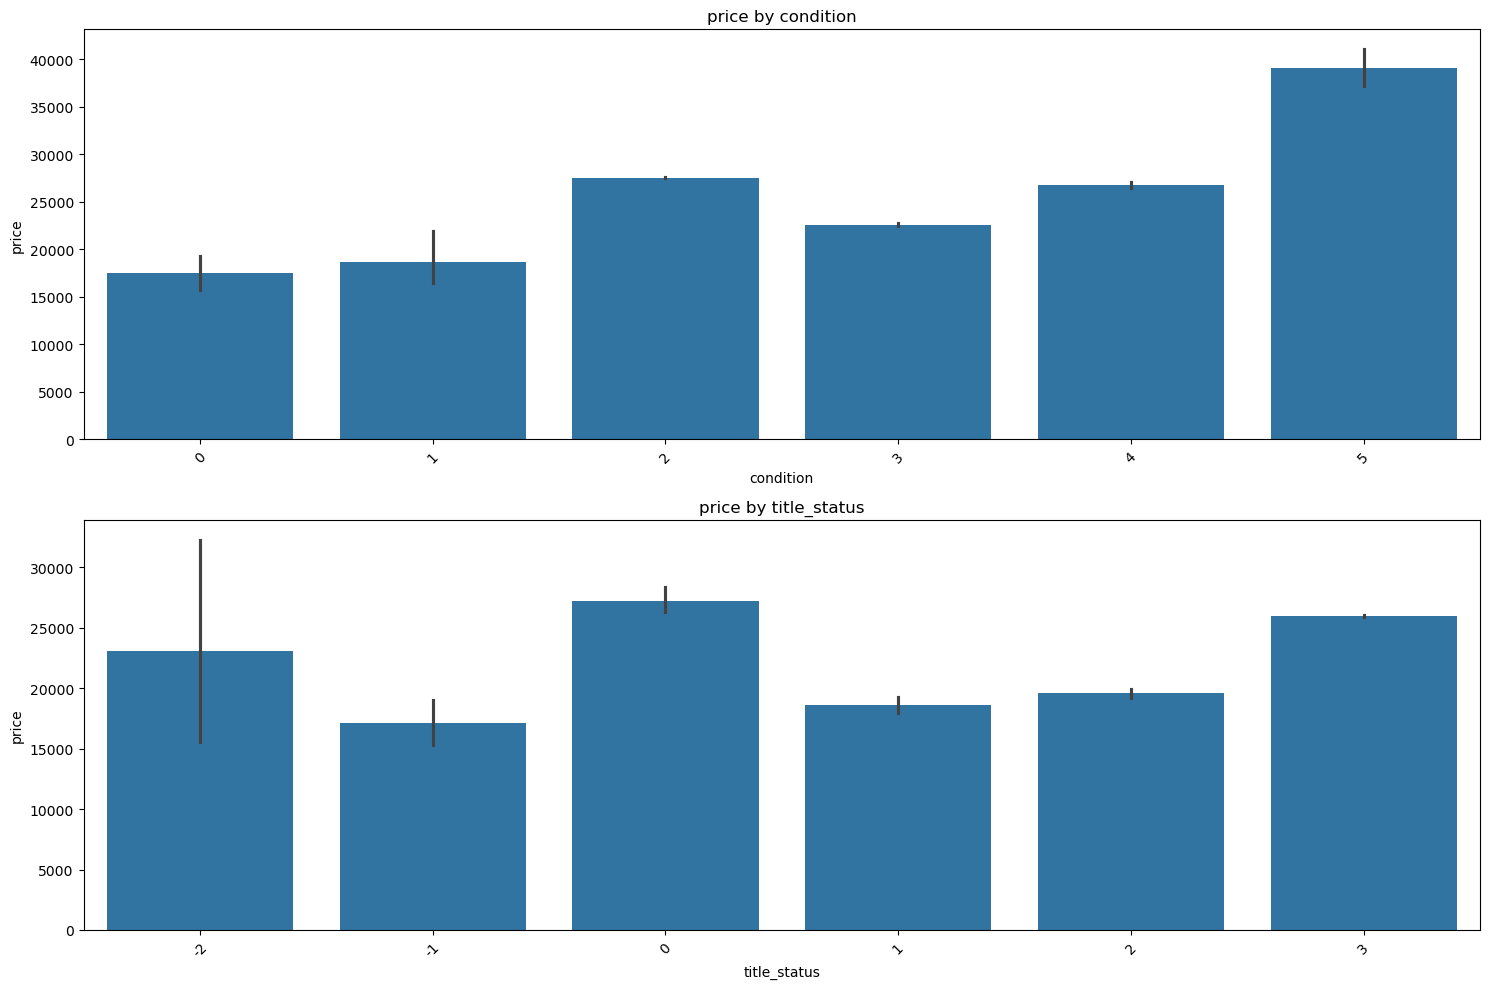

Numerical Column: year


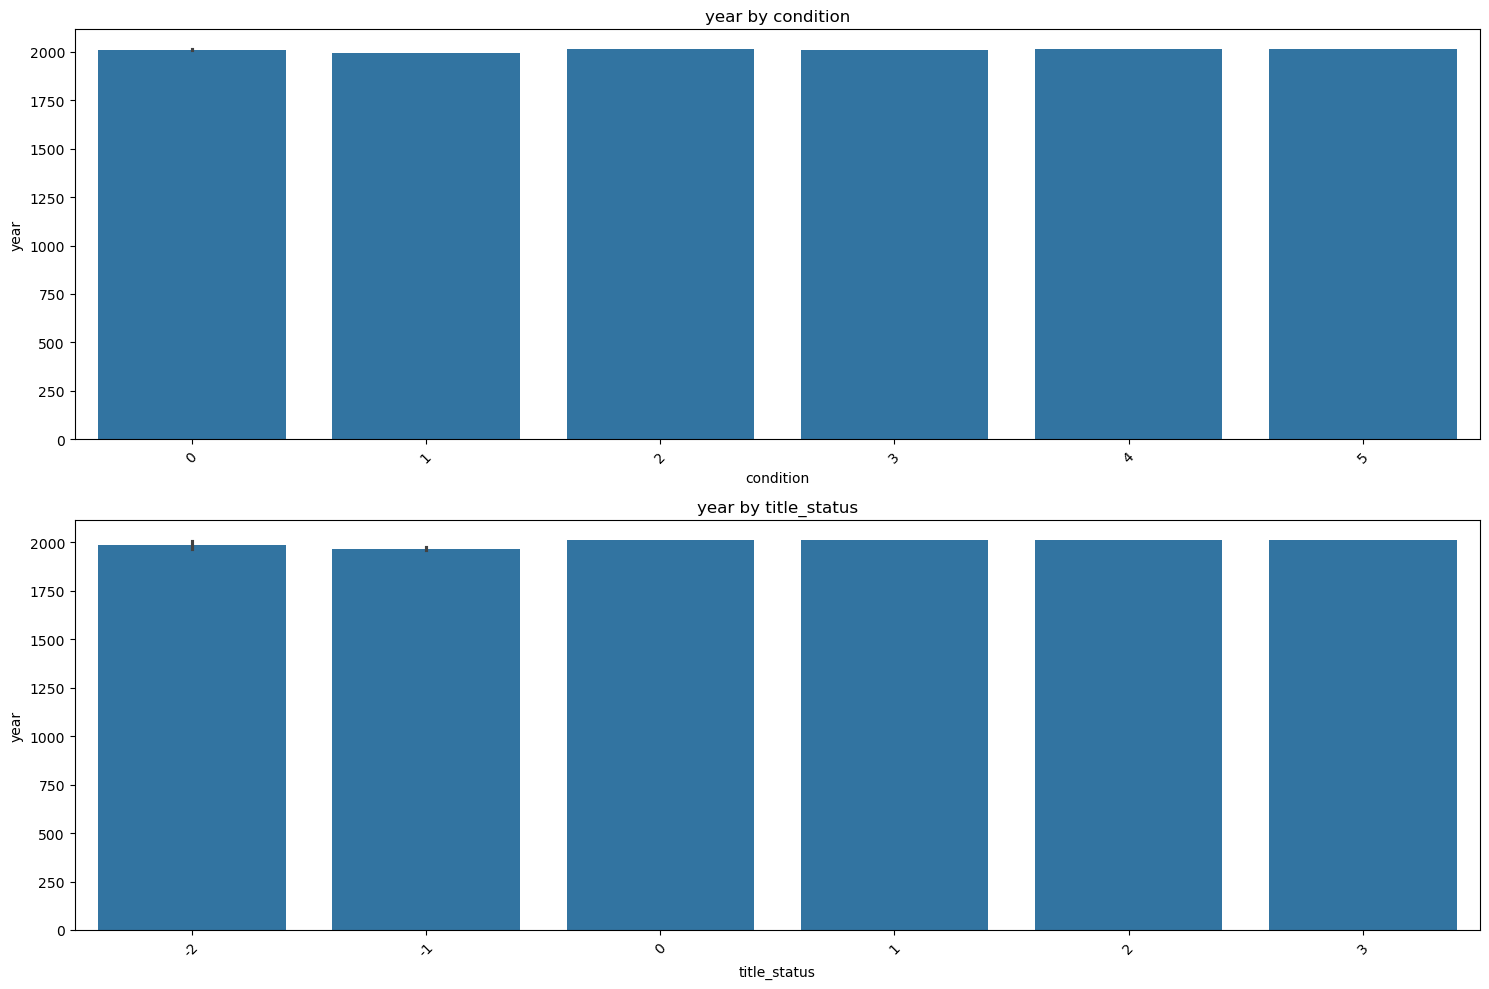

Numerical Column: odometer


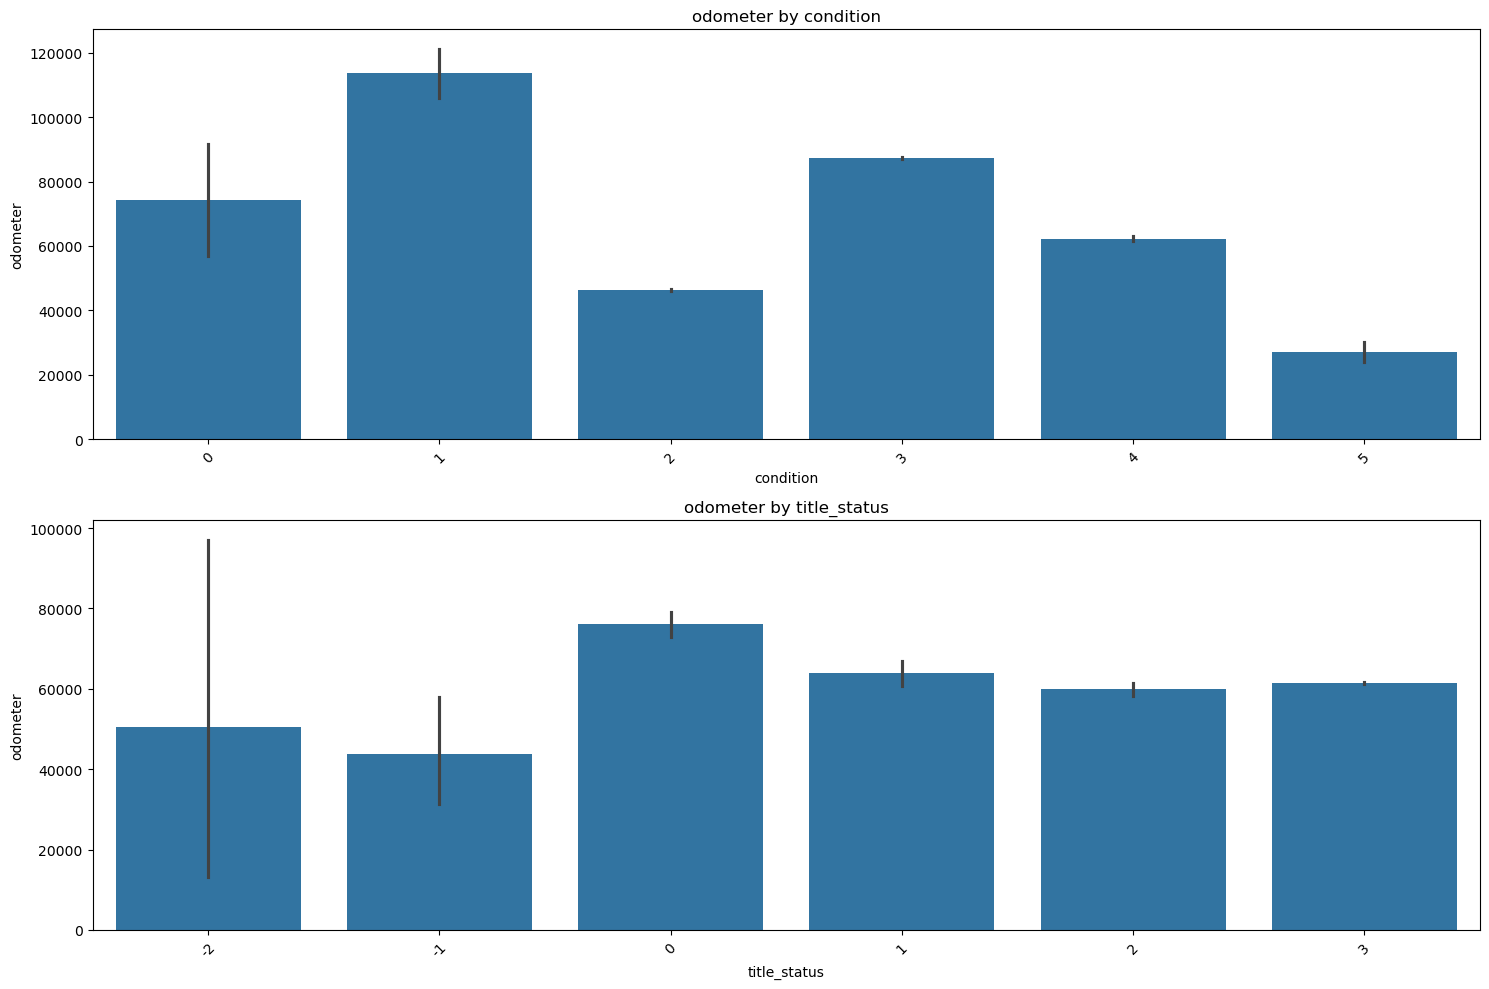

In [44]:
for i, num in enumerate(num_cols):
    print(f"Numerical Column: {num}")
    fig, axes = plt.subplots(len(ordinal_cats), 1, figsize=(15, 5 * len(ordinal_cats)), sharex=False, sharey=False)
    for j, cat in enumerate(ordinal_cats):
        ax = axes[j]
        sns.barplot(data=visualize_data, x=cat, y=num, ax=ax, errorbar=('ci', 95))
        ax.set_title(f'{num} by {cat}')
        ax.tick_params(axis='x', rotation=45)   
    plt.tight_layout()
    plt.show()
    print("=" * 30)

### Categorical - Categorical

In [45]:
#Chi-Squared Test for Categorical Features
from scipy.stats import chi2_contingency

def chi_squared_test(cat_col1, cat_col2):
    contingency_table = pd.crosstab(cleaned_data[cat_col1], cleaned_data[cat_col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

for i in range(len(low_cardinal_cat_cols)):
    for j in range(i + 1, len(low_cardinal_cat_cols)):
        col1 = low_cardinal_cat_cols[i]
        col2 = low_cardinal_cat_cols[j]
        chi2, p, dof, expected = chi_squared_test(col1, col2)
        print(f"Chi-Squared Test between {col1} and {col2}:")
        print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
        print("Expected Frequencies:\n", expected)
        print("=" * 20)

Chi-Squared Test between condition and cylinders:
Chi2: 15426.52073742185, p-value: 0.0, Degrees of Freedom: 55
Expected Frequencies:
 [[1.47585131e+00 2.10835901e-01 2.15685126e+02 3.24687287e+01
  4.21671802e-01 9.06594373e+01 1.06476347e+04 8.51777039e+01
  1.62687306e+04 1.42354292e+04 1.71198751e+02 1.02599074e+04]
 [8.20090806e-03 1.17155829e-03 1.19850413e+00 1.80419977e-01
  2.34311659e-03 5.03770066e-01 5.91660370e+01 4.73309551e-01
  9.04009527e+01 7.91024445e+01 9.51305335e-01 5.70115413e+01]
 [5.12979569e+00 7.32827955e-01 7.49682998e+02 1.12855505e+02
  1.46565591e+00 3.15116021e+02 3.70092774e+04 2.96062494e+02
  5.65472035e+04 4.94798107e+04 5.95056300e+02 3.56616068e+04]
 [3.63847900e-01 5.19782714e-02 5.31737717e+01 8.00465380e+00
  1.03956543e-01 2.23506567e+01 2.62500666e+03 2.09992217e+01
  4.01079936e+03 3.50952091e+03 4.22063564e+01 2.52941862e+03]
 [2.11691260e-02 3.02416086e-03 3.09371656e+00 4.65720772e-01
  6.04832171e-03 1.30038917e+00 1.52726172e+02 1.221760